In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

### Monte Carlo Integration

#### 1) Let integrate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a cube $x \in [-1,1], y\in [-1,1], z\in [-1,1]$

In [6]:
from typing import Tuple

def f(x: float, y: float, z: float):
    return x**2 * (y-1)**2 * (z-2)**2 * np.exp(x*y*z)

def gen_xyz() -> Tuple[float, float, float]:
    x = np.random.random()*2 - 1
    y = np.random.random()*2 - 1
    z = np.random.random()*2 - 1
    return x, y, z

def mc_integral(n: int):
    s = 0
    for _ in range(n):
        s += f(*gen_xyz()) ## k = [1,2,3] g(*k) equiv to g(1,2,3)
        # x,y,z = gen_xyz()
        # s += f(x, y, z)
    volume = 8
    return s*volume/n

mc_integral(1_000_000)

16.133741709632982

In [5]:
f(1,2,3)

403.4287934927351

#### 2) Evaluate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a sphere of radius 1 centered at the origin.

In [7]:
def is_in_circle(x, y, z):
    return x**2 + y**2 + z**2 <= 1


def mc_integral(n: int):
    s = 0
    for _ in range(n):
        x,y,z = gen_xyz()
        if is_in_circle(x,y,z):
            s += f(x, y, z)
    volume = 8 # this the volume of the covering box
    return s*volume/n

mc_integral(1_000_000)

3.9720126365646427

3) Do we guarantee to get the same answer when we repeat the experiment?

4) What do we need to do to guarantee the same answer?

5) How do we defind the convergence and how fast is the convergence for monte carlo integration?

## Hill Climbing

### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

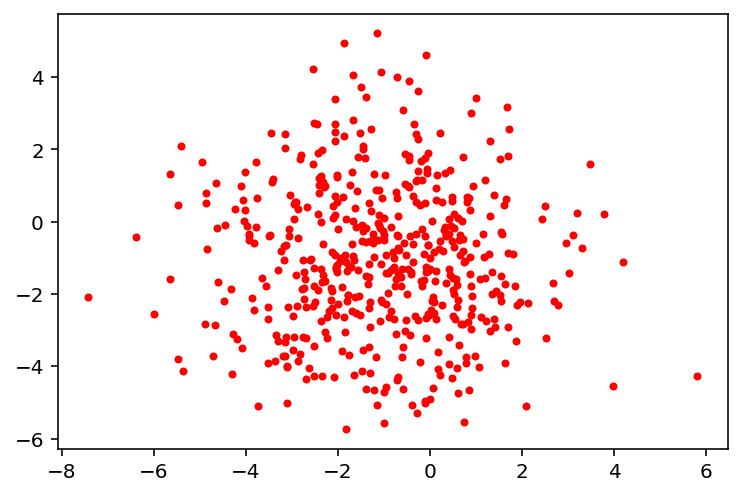

In [27]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

In [28]:
def triarea(x1,y1, x2,y2, x3,y3):
    #shoelace formula
    return 0.5*abs(x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1)

def triarea2(r):
    x1,y1 = r[0]
    x2,y2 = r[1]
    x3,y3 = r[2]
    return triarea(x1,y1, x2,y2, x3,y3)


In [31]:
from typing import List

State = List[int] # index of each corner (int, int, int)

def random_index():
    return np.random.randint(len(x))

def random_answer()-> State :
    return [random_index(), random_index(), random_index()]

def mutate(state: State) -> State: # Do not modify the argument!!!
    ret = state.copy()
    corner_to_change = np.random.randint(3)
    ret[corner_to_change] = random_index()
    return ret
    
def compute_score(state: State) -> float:
    c1, c2, c3 = state
    return triarea(
        x[c1], y[c1],
        x[c2], y[c2],
        x[c3], y[c3]
    )
    
    
def hill_climbing(initial_state: State, n:int) -> State:
    current_state = initial_state
    current_score = compute_score(initial_state)
    for _ in range(n):
        temp_state = mutate(current_state)
        temp_score = compute_score(temp_state)
        if temp_score > current_score:
            current_state = temp_state
            current_score = temp_score
            print(current_score)
    return current_state
    

In [34]:
answer = hill_climbing(random_answer(), 10000)

6.593055031500027
9.678606561349818
10.580817433416462
19.172531102935604
23.013327579247132
23.68915441466413
24.22590634706966
24.811589734811484
26.403021635877817
26.8781133876373
30.712399156015127
39.950221624505545
52.19459191061368
52.43725476214575
55.024959400561904


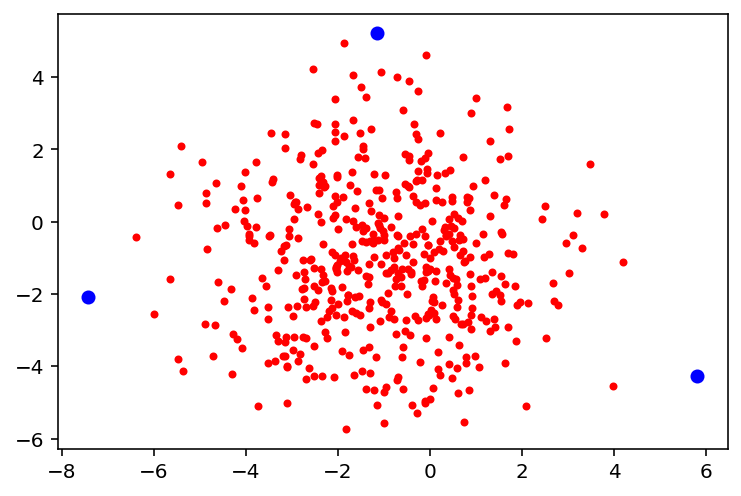

In [36]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')
c1, c2, c3 = answer
plt.plot(x[c1],y[c1],'ob')
plt.plot(x[c2],y[c2],'ob')
plt.plot(x[c3],y[c3],'ob')


In [21]:
t = [1,2,3]
ts = t.copy()

[1, 2, 3]

### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

[[ 0  0 10 ... 35  0 50]
 [ 0  0  0 ...  0 23 52]
 [10  0  0 ... 15  1 67]
 ...
 [35  0 15 ...  0  0  0]
 [ 0 23  1 ...  0  0 12]
 [50 52 67 ...  0 12  0]]


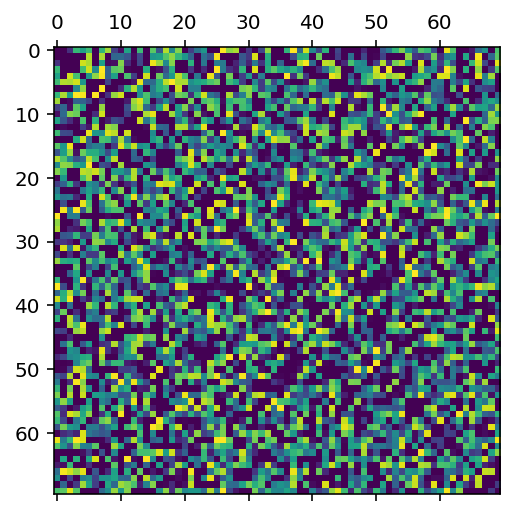

In [39]:
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))

np.random.seed(222)
for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0
    
print(student)

plt.matshow(student)

In [43]:
from typing import List

State = List[int] # each element is the slot in which the class i assigned to
n_class = 70
n_slot = 15

def random_slot():
    return np.random.randint(n_slot)

def random_answer()-> State :
    return [random_slot() for _ in range(n_class)]

def mutate(state: State) -> State: # Do not modify the argument!!!
    ret = state.copy()
    corner_to_change = np.random.randint(n_class)
    ret[corner_to_change] = random_slot()
    return ret
    
def compute_score(state: State) -> float:
    complaints = 0
    for c1 in range(n_class):
        for c2 in range(c1+1, n_class):
            if state[c1] == state[c2]: # same time slot
                complaints += student[c1][c2]
    return complaints
    
    
def hill_climbing(initial_state: State, n:int) -> State:
    current_state = initial_state
    current_score = compute_score(initial_state)
    for _ in range(n):
        temp_state = mutate(current_state)
        temp_score = compute_score(temp_state)
        if temp_score < current_score:
            current_state = temp_state
            current_score = temp_score
            print(current_score)
    return current_state
    

In [46]:
hill_climbing(random_answer(), 100_000)

3620
3571
3559
3551
3469
3454
3403
3341
3273
3241
3228
3166
3115
3095
2939
2900
2716
2694
2641
2621
2596
2584
2520
2469
2328
2320
2291
2290
2234
2217
2118
2068
1956
1950
1920
1902
1883
1851
1838
1828
1797
1790
1717
1683
1617
1571
1432
1359
1320
1315
1287
1279
1251
1233
1231
1215
1166
1158
1141
1138
1136
1125
1115
1081
1073
977
971
944
933
917
910
899
866
857
840
828
800
775
762
726
716
684
641
631
628
609
601
582
574
565
561
557
553
527
485
460
455
453
451
423
402
388
368
367
343
340
336
318
315
308
303
291
290
269
252
235
227


[6,
 6,
 6,
 13,
 9,
 12,
 6,
 5,
 10,
 4,
 12,
 3,
 0,
 0,
 7,
 9,
 13,
 7,
 0,
 10,
 2,
 3,
 11,
 11,
 11,
 0,
 8,
 13,
 9,
 0,
 12,
 10,
 4,
 9,
 2,
 3,
 1,
 11,
 12,
 1,
 9,
 5,
 14,
 14,
 8,
 4,
 13,
 2,
 11,
 6,
 14,
 7,
 4,
 2,
 13,
 4,
 8,
 8,
 1,
 2,
 3,
 7,
 10,
 6,
 1,
 5,
 12,
 14,
 5,
 12]

## Substitution Cipher is a bad idea

### Substitution Encryption

One of the weakest encryption is called substibution encryption. Here is how it works let's supposed that my message that I want to send to you is
```
this problem is easy
```

The substition encryption works by replacing each letter using a fixed dictionary. For example, suppose my encryption key dictionary is
```python
{'a':'b', 'b':'c', 'c':'d', ...}
```
This tells that every character `a` in the message should be replaced by letter `b` in the encrypted messsage and so on.

Using the dictionary above, then the encrypted message would be
```
uijt qspcmfn jt fbtz 
```

If we know the dictionary key(which is typically agreed before sending the message), it's very easy to invert. Since `a` maps to `b` in encryption that means to decrypt it we just need to replace every `b` to `a`.

ROT13 you did in programming I is an example of substitution encryption.

In this problem we will use hill climbing to crack this encryption. That is we want to decrypt the message **without** knowing what the encryption key is. We are going to use math and some probabilities. For simplicity of this problem we will only deal with lower case letters and no punctuation except for space.

### Problem

In this problem your job is to **decrypt the msssage**.
 - The encrypted message is
```
 vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum
```

Of course you are not given the encryption key. The goal is to find the best encryption key and decrypt the message.

### What is the best key?

Since you are not given the encryption key, it seems like it is impossible to decrypt the message. However, due to probabilistic nature of natural language, it is quite easy to figure out whether a random sequence of letters the real english message or not. A good key would give a decrypt message that looks like a real english message.

For example, given the same encrypted message and you guess for two keys. The first key gives you the decrypted message of
```
i am the best
```
while the second key give you the decrypted message of
```
j bn uif cftu
```
It is quite clear the that top one is more like an English language therefore the first key is probably a better key.

To tell a computer what sequence of letter looks more like English. We can take a look at thick book and look for how frequent 2 consecutive letters(bigram) appear in the book.

For example, let's take the probability of 2 consecutive letters(bigram) to appear in an english message. The bigram `th` appears way more than `di`. So, if the encryption key that gives a lot of `th` bigram is more likely to be correct than the one that gives a lot of `di`.

Plus the fact that one character word is most likely going to be either `a` or `i`. If the key we guess put `a` or `i` in there, we are probably getting the right key.

Our method relies on the fact that some n consecutive letters(n-gram) appear more than other. Fortunately, someone wrote a program to read a huge amount of English books and count how many times n-gram appear. The file for 2-gram frequency is given in `count_2l.txt` and the file for 3-gram frequency is given in `count_3l.txt`. Source: http://norvig.com/ngrams/

To help you, I already give you a function for reading those files and convert the frequencies to score(which is a log probability). (If you want to know why, take pattern recognition.). The result is kept in dictionaries(more on next section).

### How the score works

As described in the previous section, the score should be a measure of how likely a sequence of decrpyted message to be an english message. To give an accurate score, we want to split the score in to three cases depending on the length of the word.

To give a score on a decrypted message. The score will be the sum of the score on each decrypted word.
- For word with 1 letter the score is given by looking up the dictionary `unigram_score`
- For word with 2 letters the score is given by looking up the dictionary `bigram_score`
- For word with 3 or more letters the score is given by computing the score of **every trigram**. The score of each trigram is given by the dictionary `trigram_score`. For example, the decrypted word `defts` will score
```python
trigram_score['def'] + trigram_score['eft'] + trigram_score['fts']
```
- The total score is given by the sum of score for each word in the decrypted message.

#### Note:
For dictionary lookup fail just give it score of -100). `dict.get` is your friend.

### Hint

 - Do not write this whole thing in one big function. You will just confuse yourself.
 - It should converge within a couple thousand iterations. If it doesn't, try agian, it might get stuck at local minima.

In [56]:
cipher_text = 'vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum'

In [2]:
print(cipher_text)

vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum


In [52]:
import string
import math

def load_l2score_dict():
    with open('count_2l.txt') as f:
        total = 0
        d = {}
        for l in f:
            t, n = l.split()
            d[t] = int(n)
            total += int(n)
        for k,v in d.items():
            d[k] = math.log(d[k]/float(total))
        return d
    
def load_l3score_dict():
    with open('count_3l.txt') as f:
        total = 0
        d = {}
        for l in f:
            t, n = l.split()
            d[t] = int(n)
            total += int(n)
        for k,v in d.items():
            d[k] = math.log(d[k]/float(total))
    return d
unigram_score = {x: (math.log(0.5) if x=='a' or x=='i' else -100.) for x in string.ascii_lowercase }
bigram_score = load_l2score_dict()
trigram_score = load_l3score_dict()

In [10]:
print(unigram_score['a'])
print(bigram_score['th']) # more frequent word more score(less negative)
print(bigram_score['di']) # less frequent word less score(more negative)
print(trigram_score['thi'])

-0.69314718056
-3.91357006207
-5.29986826667
-6.1101524914


In [48]:
import string
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [67]:
from typing import Dict

State = Dict[str, str] # each element is the slot in which the class i assigned to

lower_cases = [x for x in string.ascii_lowercase]

def random_answer()-> State :
    return {x:x for x in string.ascii_lowercase}

def mutate(state: State) -> State: # Do not modify the argument!!!
    ret = state.copy()
    c1 = np.random.choice(lower_cases)
    c2 = np.random.choice(lower_cases)
    temp = ret[c1]
    ret[c1] = ret[c2]
    ret[c2] = temp
    return ret

def decrypt(message: str, key: State):
    return ''.join(key.get(x,' ') for x in message)

def token_score(token):
    if len(token) == 1:
        return unigram_score.get(token, -100)
    elif len(token) == 2:
        return bigram_score.get(token, -100)
    else:
        s = 0
        for i in range(len(token)-2):
            trigram = token[i:i+3]
            s+=trigram_score.get(trigram, -100)
        return s

def compute_score(state: State) -> float:
    decrypted_msg = decrypt(cipher_text, state)
    score = 0
    for token in decrypted_msg.split(' '):
        score += token_score(token)
    return score
    
def hill_climbing(initial_state: State, n:int) -> State:
    current_state = initial_state
    current_score = compute_score(initial_state)
    for _ in range(n):
        temp_state = mutate(current_state)
        temp_score = compute_score(temp_state)
        if temp_score > current_score:
            current_state = temp_state
            current_score = temp_score
            print(current_score)
    return current_state
    

In [68]:
key = hill_climbing(random_answer(), 3000)

-3884.806614641552
-3728.31348832793
-3714.137245147023
-3672.553488175213
-3657.960120262825
-3628.2396734817976
-3341.0924164333815
-3320.1212386420098
-3272.0998251981478
-3239.5390137013287
-3232.2342176523803
-3229.041847983221
-3226.844244216903
-3224.8684653291302
-3202.0734432841396
-3170.36746613979
-3170.2023402100886
-3132.9072452186156
-3102.41074221937
-3101.5152314468264
-3063.107373203191
-3033.373816117304
-3012.636392948934
-3009.5194080227907
-2983.0588630872776
-2744.597751970512
-2733.8850115052924
-2728.909394223609
-2727.754192868825
-2702.1121958193426
-2678.496129788737
-2676.4923888236394
-2672.7373849983014
-2649.3134742353277
-2646.750529258203
-2644.9502219406604
-2619.951623530803
-2610.3904627349993
-2600.5444479832126
-2508.368926055821
-2502.5862887571147
-2491.4967597756295
-2456.588764152087
-2451.387576440378
-2442.630090299538
-2391.284780280886
-2386.038967729946
-2375.2589141335316
-2306.698597357481
-2304.9455323453844
-2303.807807196536
-2292.792

In [69]:
print(key)

{'a': 'p', 'b': 'r', 'c': 'q', 'd': 'z', 'e': 'm', 'f': 'a', 'g': 'c', 'h': 'x', 'i': 'k', 'j': 'u', 'k': 's', 'l': 'y', 'm': 'e', 'n': 'o', 'o': 'n', 'p': 'd', 'q': 'w', 'r': 'i', 's': 'j', 't': 'b', 'u': 'g', 'v': 't', 'w': 'v', 'x': 'h', 'y': 'f', 'z': 'l'}


In [70]:
decrypt(cipher_text, key)

'the most merciful thing in the world i think is the inability of the human mind to correlate all its contents we live on a placid island of ignorance in the midst of black seas of infinity and it was not meant that we should voyage far the sciences each straining in its own direction have hitherto harmed us little but some day the piecing together of dissociated knowledge will open up such terrifying vistas of reality and of our frightful position therein that we shall either go mad from the revelation or flee from the light into the peace and safety of a new dark age'

In [58]:
cipher_text.split(' ')

['vxm',
 'enkv',
 'embgryjz',
 'vxrou',
 'ro',
 'vxm',
 'qnbzp',
 'r',
 'vxroi',
 'rk',
 'vxm',
 'roftrzrvl',
 'ny',
 'vxm',
 'xjefo',
 'erop',
 'vn',
 'gnbbmzfvm',
 'fzz',
 'rvk',
 'gnovmovk',
 'qm',
 'zrwm',
 'no',
 'f',
 'azfgrp',
 'rkzfop',
 'ny',
 'ruonbfogm',
 'ro',
 'vxm',
 'erpkv',
 'ny',
 'tzfgi',
 'kmfk',
 'ny',
 'royrorvl',
 'fop',
 'rv',
 'qfk',
 'onv',
 'emfov',
 'vxfv',
 'qm',
 'kxnjzp',
 'wnlfum',
 'yfb',
 'vxm',
 'kgrmogmk',
 'mfgx',
 'kvbfrorou',
 'ro',
 'rvk',
 'nqo',
 'prbmgvrno',
 'xfwm',
 'xrvxmbvn',
 'xfbemp',
 'jk',
 'zrvvzm',
 'tjv',
 'knem',
 'pfl',
 'vxm',
 'armgrou',
 'vnumvxmb',
 'ny',
 'prkkngrfvmp',
 'ionqzmpum',
 'qrzz',
 'namo',
 'ja',
 'kjgx',
 'vmbbrylrou',
 'wrkvfk',
 'ny',
 'bmfzrvl',
 'fop',
 'ny',
 'njb',
 'ybruxvyjz',
 'ankrvrno',
 'vxmbmro',
 'vxfv',
 'qm',
 'kxfzz',
 'mrvxmb',
 'un',
 'efp',
 'ybne',
 'vxm',
 'bmwmzfvrno',
 'nb',
 'yzmm',
 'ybne',
 'vxm',
 'zruxv',
 'rovn',
 'vxm',
 'amfgm',
 'fop',
 'kfymvl',
 'ny',
 'f',
 'omq',
 'pfbi',
 'fum